In [0]:
!curl -s "https://console.clouderizer.com/givemeinitsh/hQBC1DDq" | bash

Great! Your Clouderizer project is initializing...it might take few minutes before it is ready.

**************************************************************************************
YOU SHOULD NOW SWITCH BACK TO CLOUDERIZER WEB PAGE TO START WORKING ON YOUR PROJECT
**************************************************************************************


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pwd
%cd drive/'My Drive'

/content
/content/drive/My Drive


In [0]:
!unzip expression.zip

In [0]:
%cd 'expression'

/content/drive/My Drive/expression


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
!pwd

/content/drive/My Drive/expression


In [0]:
from pathlib import Path
path = Path('/content/drive/My Drive/expression')

In [0]:
path.ls()

[PosixPath('/content/drive/My Drive/expression/train'),
 PosixPath('/content/drive/My Drive/expression/models'),
 PosixPath('/content/drive/My Drive/expression/valid')]

In [0]:
classes = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,
                                  ds_tfms=get_transforms(),
                                  size=64,
                                  num_workers=4).normalize(imagenet_stats)

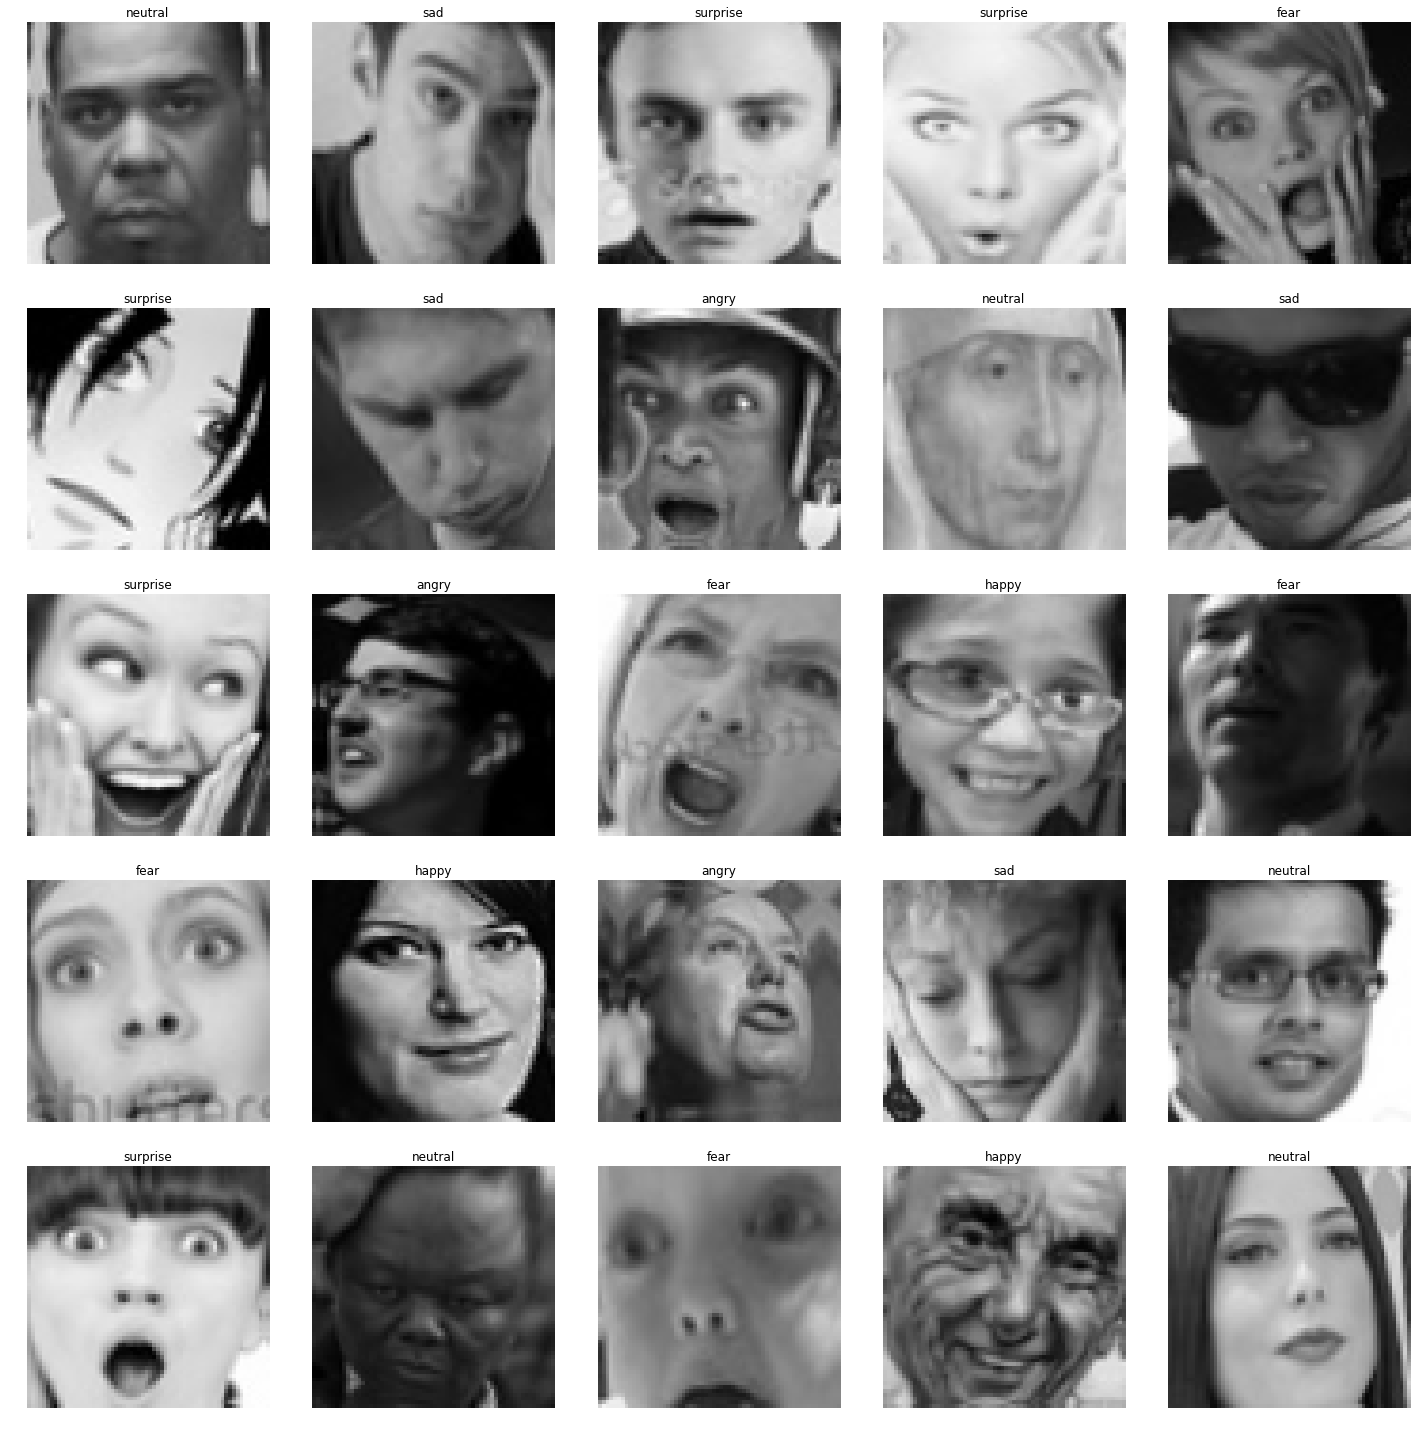

In [0]:
data.show_batch()

In [0]:
data.classes

['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 99142645.10it/s]


In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.734237,1.605047,0.347945,0.652055,1:00:11
1,1.565690,1.496269,0.394795,0.605205,02:42
2,1.423584,1.367350,0.465845,0.534155,02:39
3,1.333722,1.280961,0.503379,0.496621,02:38
4,1.279635,1.235880,0.518356,0.481644,02:35
5,1.250845,1.203311,0.533425,0.466575,02:34
6,1.225420,1.182503,0.542648,0.457352,02:34
7,1.183205,1.171007,0.549589,0.450411,02:34
8,1.190291,1.164403,0.554247,0.445753,02:32
9,1.183122,1.163049,0.555434,0.444566,02:33


In [1]:
learn.lr_find()
learn.recorder.plot()

NameError: ignored

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2, slice(1e-4, 1e-5))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.959158,0.969215,0.626484,0.373516,02:44
1,0.905433,0.945567,0.644566,0.355434,02:45


In [0]:
learn.save('expression_2')

In [0]:
learn.load('expression_1')

Learner(data=ImageDataBunch;

Train: LabelList (42984 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
happy,happy,happy,happy,happy
Path: /content/drive/My Drive/expression;

Valid: LabelList (10950 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
happy,happy,happy,happy,happy
Path: /content/drive/My Drive/expression;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1

In [0]:
inter = ClassificationInterpretation.from_learner(learn)

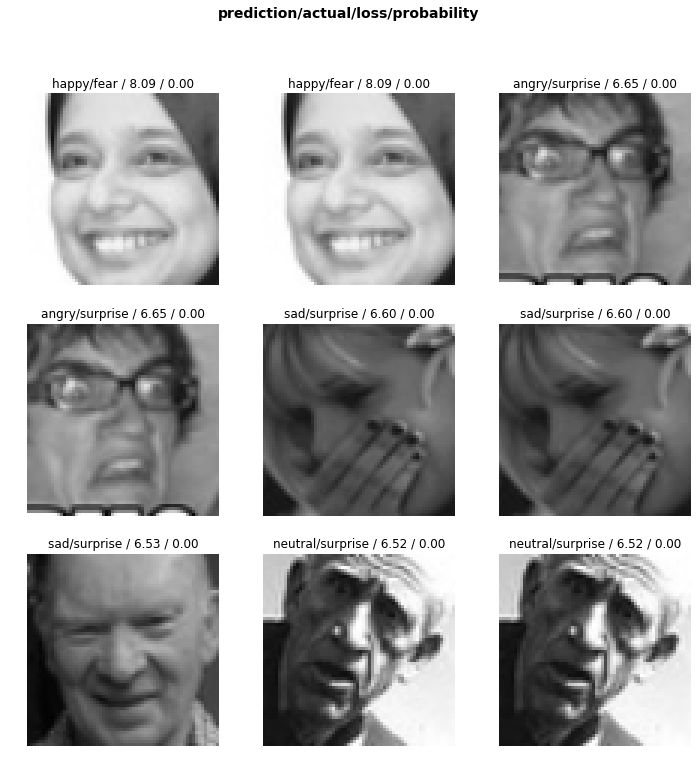

In [0]:
inter.plot_top_losses(9, heatmap = False)

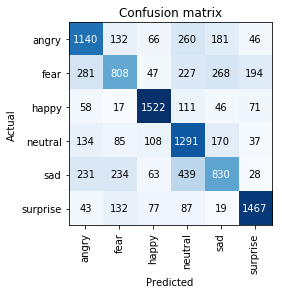

In [0]:
inter.plot_confusion_matrix()

In [0]:
print(len(data.valid_ds))